In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read cvs file 
dfx = pd.read_csv('../csv_files/p4stdev.csv', index_col=0)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,2.227033,0.029074,1.927893,1.351792,1.493802,0.640426,0.984202,0.615270,0.169556,0.209529,0.221915,1.0,0
1,2.524740,-0.013352,1.720483,2.487306,0.000000,0.644753,0.982361,0.609752,0.148247,0.223103,0.221556,0.0,1
2,2.116933,0.020715,1.395264,1.214656,0.000000,0.636816,0.984287,0.628717,0.226322,0.184411,0.225078,1.0,1
3,2.436077,0.020023,1.429303,1.193831,0.000000,0.539634,0.985673,0.628490,0.213167,0.192593,0.237040,1.0,1
4,2.075782,-0.034895,2.929681,1.315407,1.307660,0.587413,0.980484,0.603993,0.165315,0.215782,0.224143,1.0,0


In [3]:
# filter out binary variables
dfbinary = dfx.filter(['C2','C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [4]:
# drop binary variables from dfx dataframe
dfx = dfx.drop(labels=['C2', 'C3p'],axis=1)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p
0,2.227033,0.029074,1.927893,1.351792,1.493802,0.640426,0.984202,0.615270,0.169556,0.209529,0.221915
1,2.524740,-0.013352,1.720483,2.487306,0.000000,0.644753,0.982361,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.020715,1.395264,1.214656,0.000000,0.636816,0.984287,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.020023,1.429303,1.193831,0.000000,0.539634,0.985673,0.628490,0.213167,0.192593,0.237040
4,2.075782,-0.034895,2.929681,1.315407,1.307660,0.587413,0.980484,0.603993,0.165315,0.215782,0.224143


In [5]:
dfx.skew()

C1     0.517378
C4    -0.342221
C7     0.301994
C5p    0.163372
C6p    0.604254
T4p   -0.112615
T3p   -6.805157
T5p   -0.292071
S1p    0.130638
S2p    0.353207
S3p    0.460775
dtype: float64

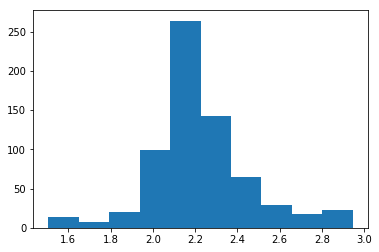

In [6]:
# show distribution of one column
# notice the scale on the x-axis is not 0 to 1
plt.hist(dfx['C1'])
plt.show()

In [7]:
# import the preprocessing package from sklearn 
from sklearn import preprocessing
# define column names
names = dfx.columns

# create scaler variable 
scaler = preprocessing.StandardScaler()

# fit and scale data 
dfxstandard = scaler.fit_transform(dfx)
dfxstandard = pd.DataFrame(dfxstandard, columns=names)

In [8]:
# check if data was scaled correctly
# mean and stdev should be equal to or almost equal to 0 and 1 respectively 
dfxstandard.describe()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02
mean,-7.371099e-16,2.083703e-17,3.906943e-17,-8.334812e-17,1.302314e-17,1.082223e-15,2.646303e-15,2.435328e-15,-3.776712e-17,-8.152488e-16,-2.560350e-15
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00
min,-3.003018e+00,-3.046311e+00,-2.412942e+00,-3.102178e+00,-7.599327e-01,-3.298476e+00,-1.048432e+01,-7.096903e+00,-3.524846e+00,-3.339850e+00,-3.579637e+00
25%,-5.315021e-01,-6.419006e-01,-6.584950e-01,-5.802978e-01,-7.599327e-01,-6.788953e-01,-1.573906e-02,-5.213248e-01,-6.125385e-01,-6.711211e-01,-6.560584e-01
50%,-1.461683e-01,-3.319238e-03,-7.492592e-02,3.063847e-03,-7.599327e-01,9.598113e-03,8.665499e-02,3.310552e-02,-4.943467e-02,-4.991345e-02,5.463402e-03
75%,3.691021e-01,7.288663e-01,7.257601e-01,5.370669e-01,1.137369e+00,6.511760e-01,1.801224e-01,5.422655e-01,6.042630e-01,5.947703e-01,5.455320e-01
max,3.019685e+00,2.646272e+00,3.047990e+00,3.376404e+00,2.185558e+00,3.507758e+00,1.042032e+01,9.811542e+00,3.949526e+00,3.532883e+00,4.297567e+00


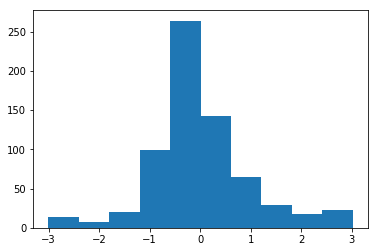

In [9]:
# notice different scale on the x-axis
# data has bee scaled correctly 
plt.hist(dfxstandard['C1'])
plt.show()

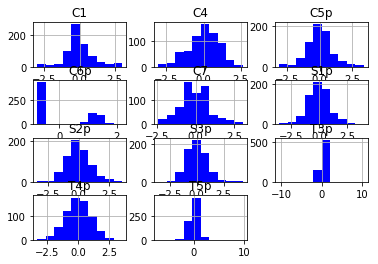

In [10]:
# examine distribution for all variables 
for col in dfxstandard.columns:
    dfxstandard.hist(color='blue') #, range=(-2,2))
    break
plt.show()

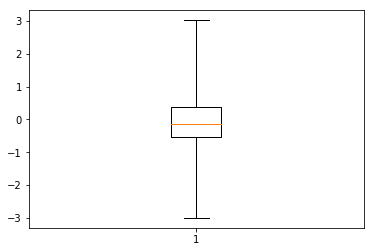

In [11]:
# use boxplots as another way to check if the variables have been scaled correctly
# mean line should line up with the 0 tick mark on the left axis 
plt.boxplot(dfxstandard['C1'], whis='range')
plt.show()

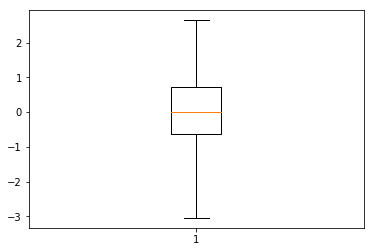

In [12]:
plt.boxplot(dfxstandard['C4'], whis='range')
plt.show()

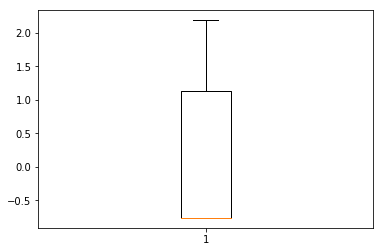

In [13]:
plt.boxplot(dfxstandard['C6p'], whis='range')
plt.show()

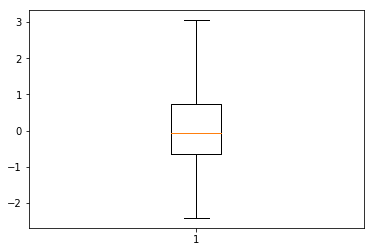

In [14]:
plt.boxplot(dfxstandard['C7'], whis='range')
plt.show()

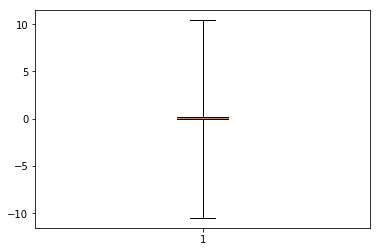

In [15]:
plt.boxplot(dfxstandard['T3p'], whis='range')
plt.show()

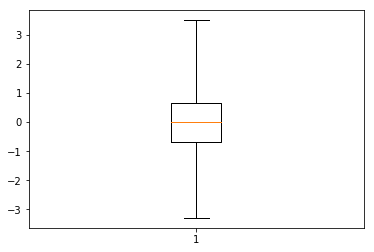

In [16]:
plt.boxplot(dfxstandard['T4p'], whis='range')
plt.show()

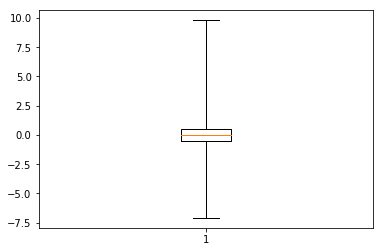

In [17]:
plt.boxplot(dfxstandard['T5p'], whis='range')
plt.show()

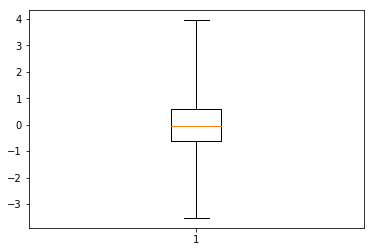

In [18]:
plt.boxplot(dfxstandard['S1p'], whis='range')
plt.show()

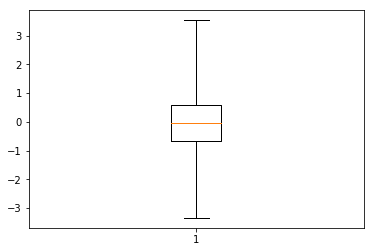

In [19]:
plt.boxplot(dfxstandard['S2p'], whis='range')
plt.show()

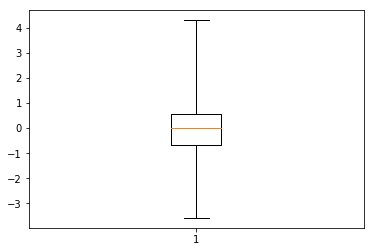

In [20]:
plt.boxplot(dfxstandard['S3p'], whis='range')
plt.show()

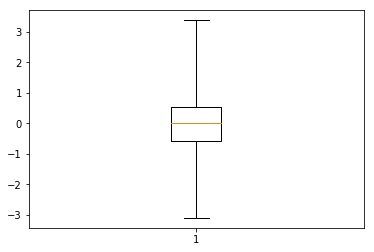

In [21]:
plt.boxplot(dfxstandard['C5p'], whis='range')
plt.show()

In [22]:
# concat dfxstandard with dfbinary to create an updated dfx dataframe
dfx = pd.concat([dfxstandard, dfbinary], axis=1)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,0.013297,0.671107,-0.561408,0.054797,1.282356,0.168664,0.174370,0.310576,-0.147291,0.165044,-0.128181,1.0,0
1,1.259277,-0.641901,-0.861441,2.432764,-0.759933,0.229323,0.099791,-0.016410,-1.241195,0.781034,-0.147795,0.0,1
2,-0.447500,0.412402,-1.331894,-0.232390,-0.759933,0.118072,0.177832,1.107408,2.766871,-0.974778,0.044531,1.0,1
3,0.888201,0.390990,-1.282655,-0.276002,-0.759933,-1.244015,0.233984,1.093939,2.091573,-0.603481,0.697712,1.0,1
4,-0.619728,-1.308620,0.887747,-0.021399,1.027869,-0.574359,0.023742,-0.357698,-0.365024,0.448793,-0.006539,1.0,0


In [23]:
# verify that the correct values are being used in the new dataframe
dfx.describe()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,682.000000,682.000000
mean,-7.371099e-16,2.083703e-17,3.906943e-17,-8.334812e-17,1.302314e-17,1.082223e-15,2.646303e-15,2.435328e-15,-3.776712e-17,-8.152488e-16,-2.560350e-15,0.863636,0.463343
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,0.343426,0.499020
min,-3.003018e+00,-3.046311e+00,-2.412942e+00,-3.102178e+00,-7.599327e-01,-3.298476e+00,-1.048432e+01,-7.096903e+00,-3.524846e+00,-3.339850e+00,-3.579637e+00,0.000000,0.000000
25%,-5.315021e-01,-6.419006e-01,-6.584950e-01,-5.802978e-01,-7.599327e-01,-6.788953e-01,-1.573906e-02,-5.213248e-01,-6.125385e-01,-6.711211e-01,-6.560584e-01,1.000000,0.000000
50%,-1.461683e-01,-3.319238e-03,-7.492592e-02,3.063847e-03,-7.599327e-01,9.598113e-03,8.665499e-02,3.310552e-02,-4.943467e-02,-4.991345e-02,5.463402e-03,1.000000,0.000000
75%,3.691021e-01,7.288663e-01,7.257601e-01,5.370669e-01,1.137369e+00,6.511760e-01,1.801224e-01,5.422655e-01,6.042630e-01,5.947703e-01,5.455320e-01,1.000000,1.000000
max,3.019685e+00,2.646272e+00,3.047990e+00,3.376404e+00,2.185558e+00,3.507758e+00,1.042032e+01,9.811542e+00,3.949526e+00,3.532883e+00,4.297567e+00,1.000000,1.000000


In [24]:
# read in y variables csv file
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,10.0,9.5,8.5,11.870000,9.0,0,1
1,8.0,10.0,8.0,7.250000,9.0,1,0
2,7.0,14.0,12.0,6.700000,13.0,1,0
3,11.5,16.0,14.0,12.390000,15.0,1,1
4,21.0,21.0,19.0,56.599998,20.0,0,1


In [25]:
# read in id csv file
dfid = pd.read_csv('../csv_files/id.csv', index_col=0)
dfid.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [26]:
# concat dfid and dfy
df = pd.concat([dfid, dfy], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1


In [27]:
# concat df and dfx to get the full dataframe
df = pd.concat([df, dfx], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,...,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,...,0.054797,1.282356,0.168664,0.174370,0.310576,-0.147291,0.165044,-0.128181,1.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,...,2.432764,-0.759933,0.229323,0.099791,-0.016410,-1.241195,0.781034,-0.147795,0.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,...,-0.232390,-0.759933,0.118072,0.177832,1.107408,2.766871,-0.974778,0.044531,1.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,...,-0.276002,-0.759933,-1.244015,0.233984,1.093939,2.091573,-0.603481,0.697712,1.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,...,-0.021399,1.027869,-0.574359,0.023742,-0.357698,-0.365024,0.448793,-0.006539,1.0,0


In [28]:
# export total dataframe 
df.to_csv('../csv_files/p4final.csv')

In [29]:
# export only dfx dataframe 
dfx.to_csv('../csv_files/p4zscorex.csv')